# MPSlib: Using a sparse TI
An example of using a sparse TI with MPSLib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpslib as mps


In [8]:
# Initialize MPSlib using default algortihm, and seetings
#O = mps.mpslib();

# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid of size [80,70,1]
O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[200,100,1])

# specific parameters can be parsed directly when calling mps.mpslib (as abobve), or set by updating the O and O.par structure as 
#O.parameter_filename = 'mps_snesim.txt'
O.par['debug_level']=-1
O.par['n_cond']=25
O.par['n_real']=16
O.par['n_threads']=5
O.par['do_entropy']=1
O.par['simulation_grid_size']=np.array([128,128,1])



Using mps_snesim_tree installed in /mnt/d/PROGRAMMING/mpslib (scikit-mps in /mnt/d/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)


# Setup sparse TI 
Alle values of -997799 will be treated as missing data

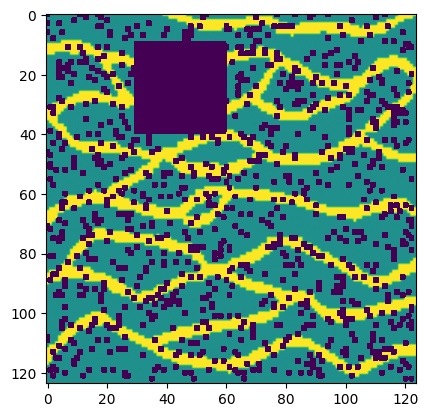

In [28]:
TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
nanval=-997799
TI2=TI;
TI2[30:60,10:40]=nanval

n=1000;
ixx=np.random.randint(0,123,n)
iyy=np.random.randint(0,123,n)
for i in range(n):
    TI2[iyy[i],ixx[i]]=nanval

O.ti = TI2
O.par['ti_fnam']='ti_sparse.ti'



plt.imshow(O.ti[:,:,0].T, vmin=-1)


In [29]:
d_hard =  arr = np.empty((0,4), int)
for ix in np.arange(O.ti.shape[0]):
    for iy in np.arange(O.ti.shape[1]):
        if (O.ti[iy,ix,0]>-1):            
            d_hard = np.append(d_hard, np.array([[iy,ix,0,O.ti[iy,ix,0]]]), axis=0)
O.d_hard = d_hard   
print(O.d_hard.shape)         

(13570, 4)


parallel: Using 4 of max 52 threads
124 124 4124 124 4124 124 4124 124 4





Can't open Can't open mask.dat !

Can't open mask.dat !

mask.dat !

Can't open mask.dat !



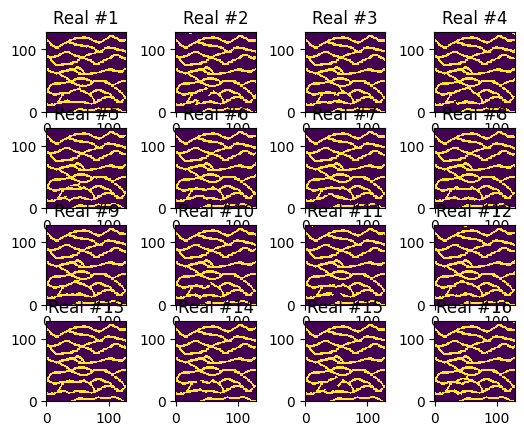

In [30]:
#O.run()
O.run_parallel()
O.plot_reals()


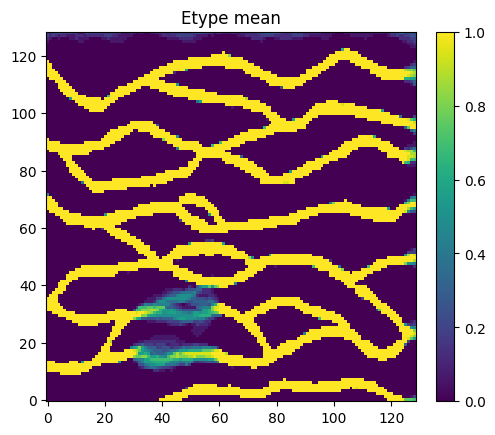

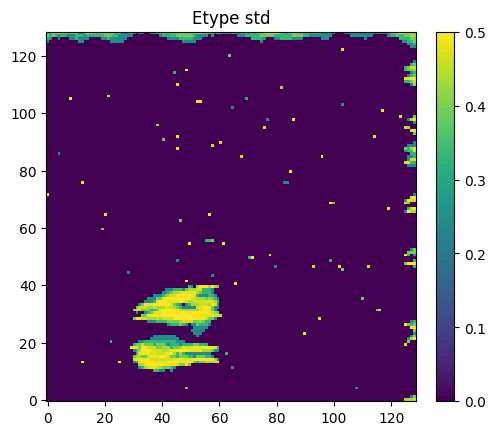

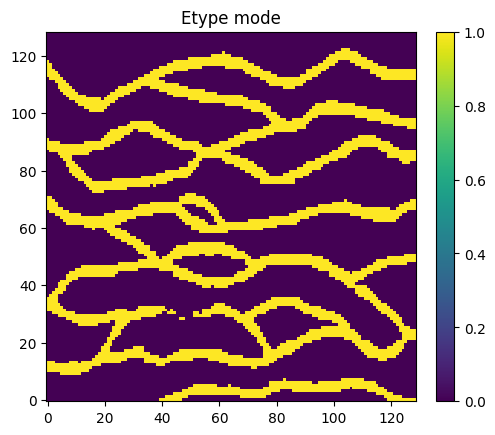

In [31]:
O.plot_etype()


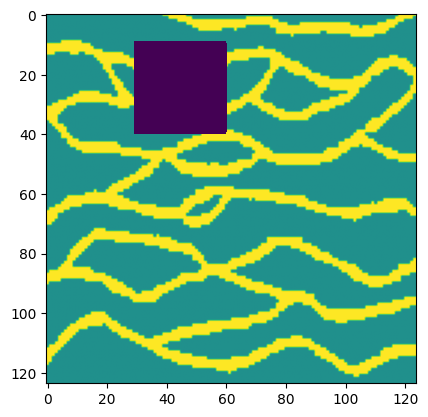

In [7]:
plt.imshow(O.ti[:,:,0].T, vmin=-1)


(124, 124, 4)